# OpenCV Opdrachten
- Minor Applied Artificial Intelligence, Hogeschool van Amsterdam (AUAS)
- Docent:  Michiel Bontenbal 
- Datum: Vrijdag 9 februari 2024

### Doel van dit notebook
In dit Notebook leer je:

- hoe je randen in foto's kan detecteren ('Edge Detection)
- hoe je gezichten kan herkennen met Haar Cascade algoritme

### Wat je moet doen
- Maak de 8 oefeningen in het notebook
- Sla het notebook op in je Gitlab & maak aantekeningen in je logboek.

### Inhoud
0. Installeer en importeer de modules
1. Edge Detection met OpenCV
2. Detecteer gezichten met Haar Cascade
3. Gebruik je webcam

### Tutorial
 
**Geeks for Geeks tutorial**

https://www.geeksforgeeks.org/opencv-python-tutorial/

**OpenCV Python documentatie**

https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html


----
Acknowledgements: Stijn Oomes

## 0. Installeer en importeer de libraries

Als OpenCV niet is geïnstalleerd, installeer deze met onderstaand pip commando.

bron: https://pypi.org/project/opencv-python/

In [98]:
!pip install opencv-python


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Importeer dan de volgende libraries:

- `opencv`
- `numpy`
- `matplotlib` 
- `PIL` 

In [99]:
#import the libraries
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

In [100]:
#print opencv version
print(cv2.__version__)

4.9.0


## 1. Edge Detection met OpenCV

OpenCV kan beelden inlezen, maar de MatPlotLibrary ook; vanwege heel rare en ingewikkelde problemen is het makkelijker om MatPlotLib te gebruiken. Gebruik het commando ```plt.imread('path-to-image')``` om een plaatje in te lezen.

Met MatPlotLib kan je dan ook het plaatje tonen in je notebook. Dit doe je met het commando ```imshow(image)```; ```plt.figure(figsize=(10,10))``` geeft de beeldverhoudingen aan, vierkant in dit geval, en ```plt.axis('off');``` zorgt dat er geen x- en y-as getekend worden, want dat zou er raar uitzien bij een plaatje.

Ons advies is om het plaatje 'speelgoed.jpg' te gebruiken. Deze kan je downloaden van DLO in dezelfde folder als dit notebook. Dan werkt onderstaande code erg goed. Als je wilt dan mag je zelf ook een eigen plaatje gebruiken. 


### Importeer en toon een .jpg afbeelding

Let op: de code werkt alleen met een .jpg of .jpeg plaatje. Dus géén .png gebruiken.
Wij adviseren het plaatje 'speelgoed.jpg' te gebruiken (zie DLO) want dat werkt heel mooi. Wil je een ander plaatje gebruiken, dan mag dat ook.

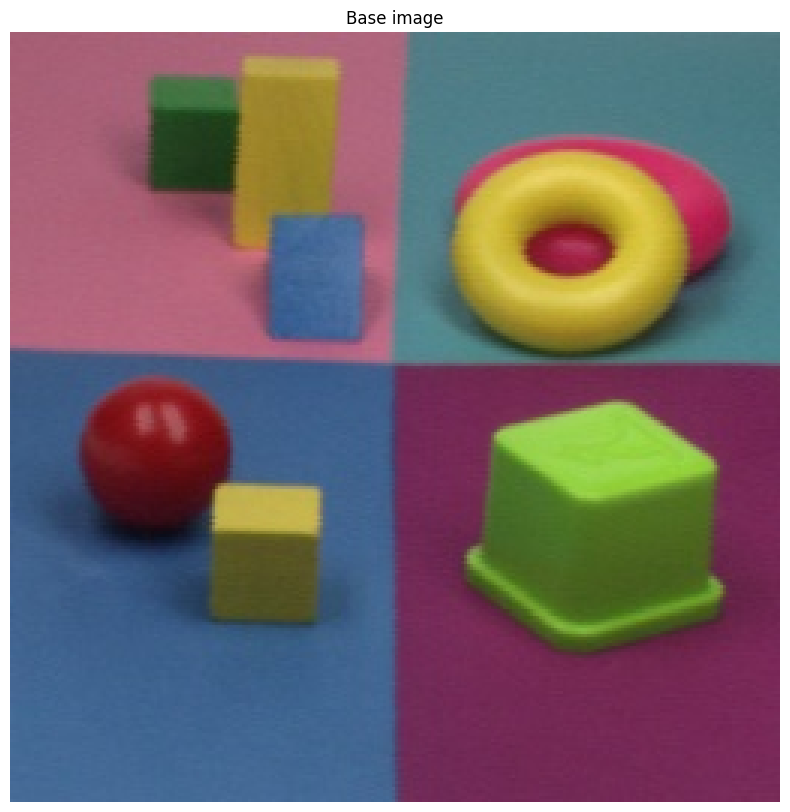

In [101]:
#CODE EXAMPLE
img = plt.imread('speelgoed.jpg')  # select image / change path 

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title('Base image')
plt.axis('off');

OpenCV heeft ook funkties om de kleur, kleurruimte, van plaatjes te veranderen; ```COLOR_RGB2GRAY``` gaat dus van RGB (kleur) naar gray (grijswaarden). Met het commando ```plt.imshow(gray, cmap='gray')``` zorg je ervoor dat er grijswaarden in de plot gebruikt worden, anders kiest matPlotLib een stadaard kleurenschema dat niet grijs is, een soort geel radarscherm kleurschema...

### OEFENING 1: Converteer je plaatje naar grijswaarden


Gebruik de Geeks for Geeks tutorial: https://www.geeksforgeeks.org/opencv-python-tutorial/

In [102]:
# Use the cvtColor() function to grayscale the image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

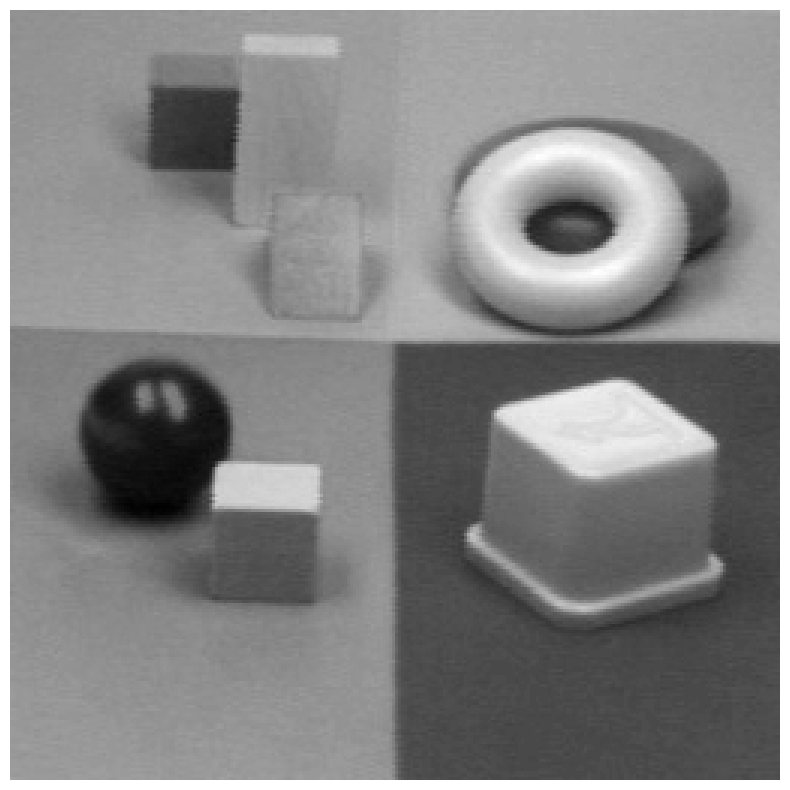

In [103]:
#CODE EXAMPLE: plot het plaatje met matplotlib

plt.figure(figsize=(10,10))
plt.imshow(gray, cmap='gray')
plt.axis('off');

### Detecteer de randen met het Canny algoritme

Een veel voorkomende bewerking in Computer Vision is het herkennen van randen in plaatjes. We gebruiken het Canny algoritme, omdat dat een van de meest gebruikte algoritmes is. Hoe Canny werkt kan je hier nalezen:

- https://nl.wikipedia.org/wiki/Canny-randzoeker
- https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html
- https://www.geeksforgeeks.org/python-opencv-canny-function/

Het commando is ```cv2.Canny(gray, 10, 40)```, waarbij ```gray``` het input plaatje is, de 10 en 40 grenzen zijn wanneer een rand herkend wordt; je gaat in de oefening hier mee spelen. Deze waarden werken goed voor mijn plaatje en vast ook voor jou. Kijk in de documentatie van OpenCV hoe je de waarden kan aanpassen.

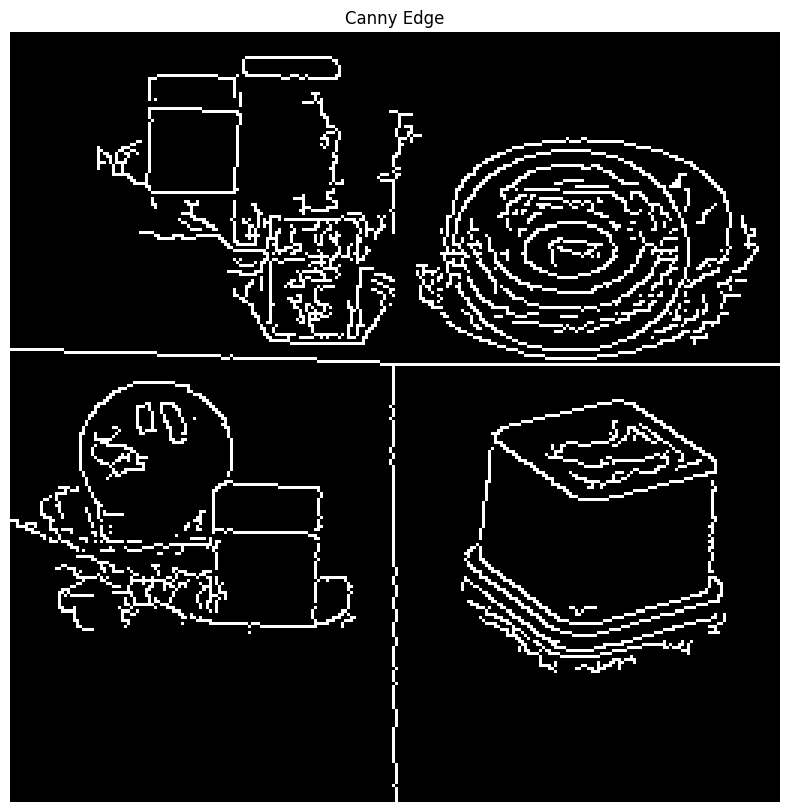

In [104]:
#CODE EXAMPLE
edges = cv2.Canny(gray, 10, 40)

plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge')
plt.axis('off');

### OEFENING 2 : Optimale waarden voor Canny Edge

Pas de waarden voor de canny edge detectie aan en laat het resultaat zien. Speel hier even mee!

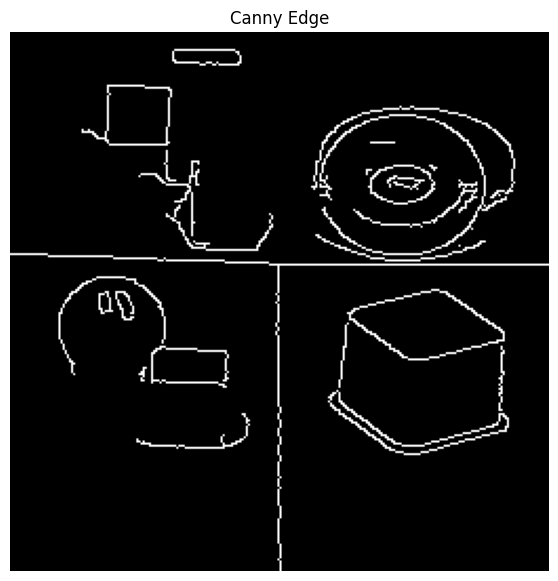

In [105]:
edges = cv2.Canny(gray, 30, 110)

plt.figure(figsize=(7,7))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge')
plt.axis('off');

### Andere kleurruimtes: HSV

Zoals je gezien hebt, zitten er best wat *foute* edges bij. Ook maakt de edge detector geen onderscheid tussen schaduwrandenof highlights en de *echte* randen van het object.

Zouden we hier wat aan kunnen doen?

*HSV*, Hue, Saturation en Value, is een adere manier om kleuren te beschrijven; je kent het misschien van PhotoShop. 

- Hue is tint
- Saturation is hoeveel van die tint er in zit
- Value is de helderheid. 

Lees onderstaande voor een introductie op HSV:
- https://www.geeksforgeeks.org/hsv-color-model-in-computer-graphics/


### OEFENING 3: Converteer van RGB naar HSV waarden

Lees de volgende tutorial en zoek het commando op om je kleurenplaatje om te zetten van RGB => HSV waarden: 
- https://www.educba.com/opencv-hsv-range/

In [106]:
# Converteer van RGB naar HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


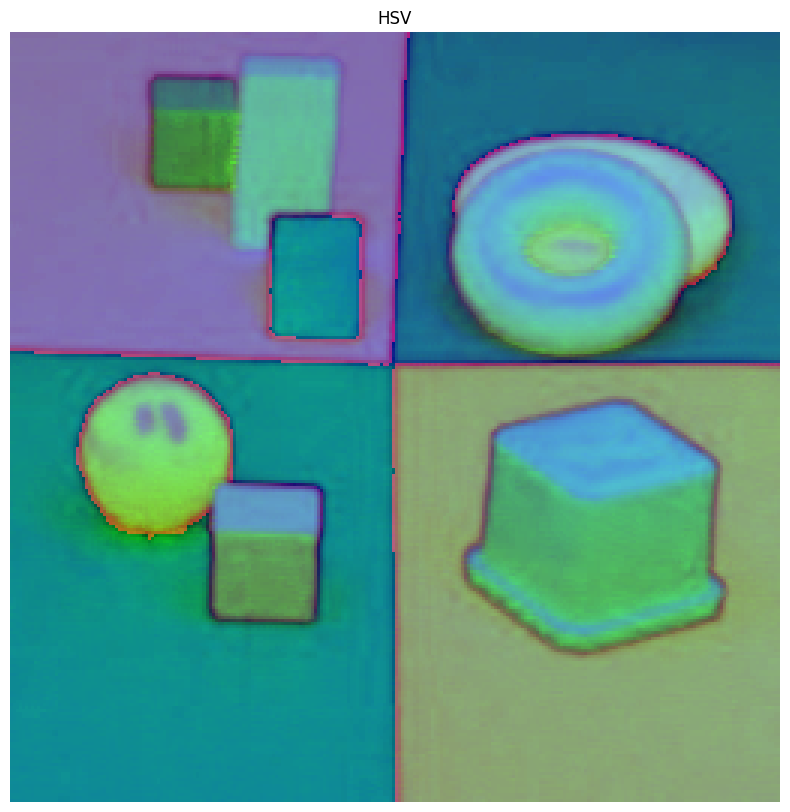

In [107]:
#plot the HSV-image
plt.figure(figsize=(10,10))
plt.imshow(hsv) #de naam van je hsv-plaatje
plt.title('HSV')
plt.axis('off');

Het wordt pas interessant wanneer we de kleur kanalen apart weergeven.

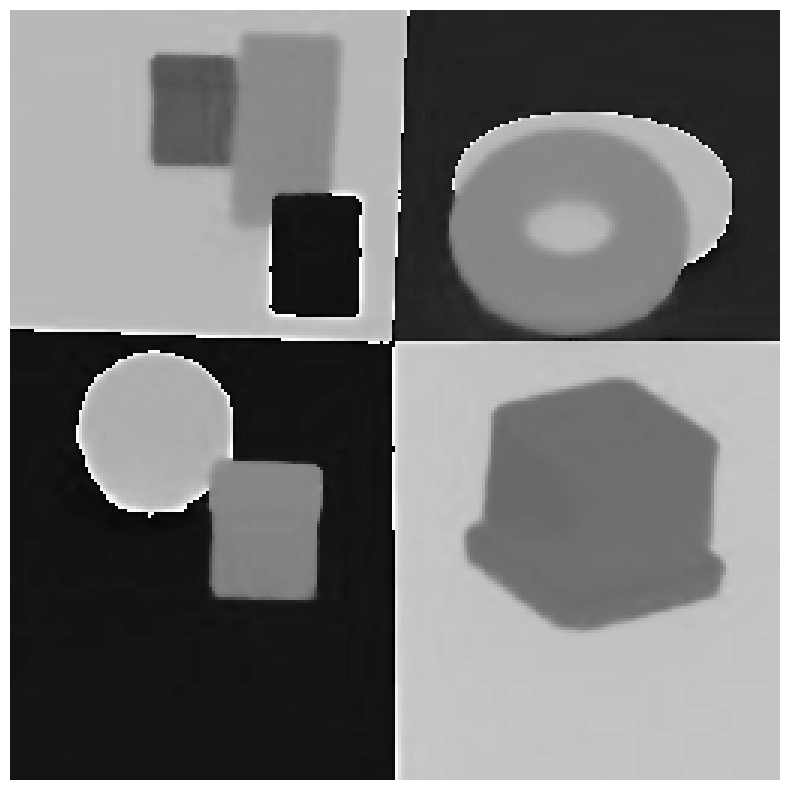

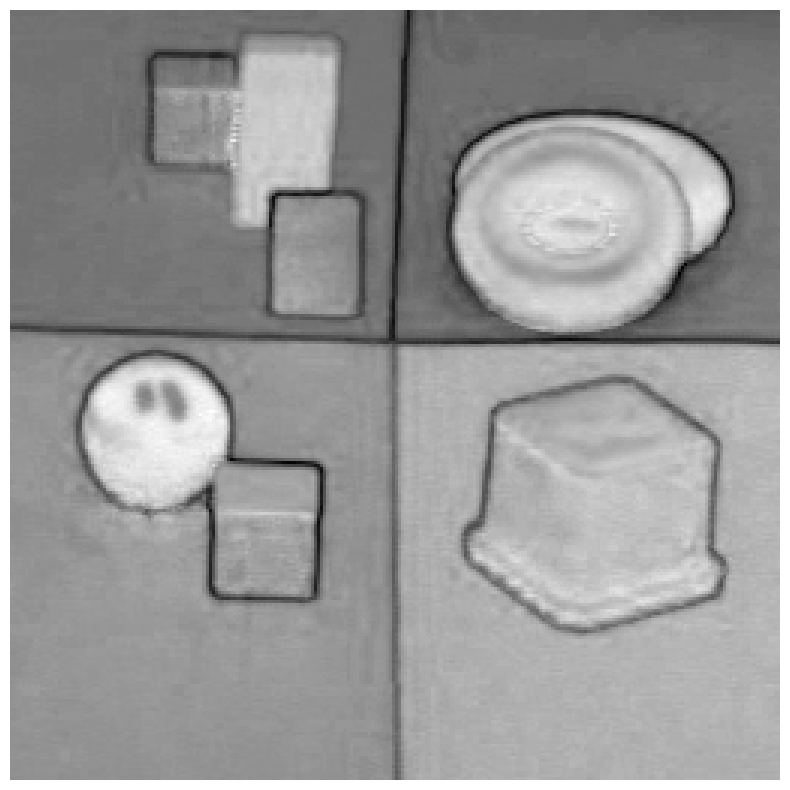

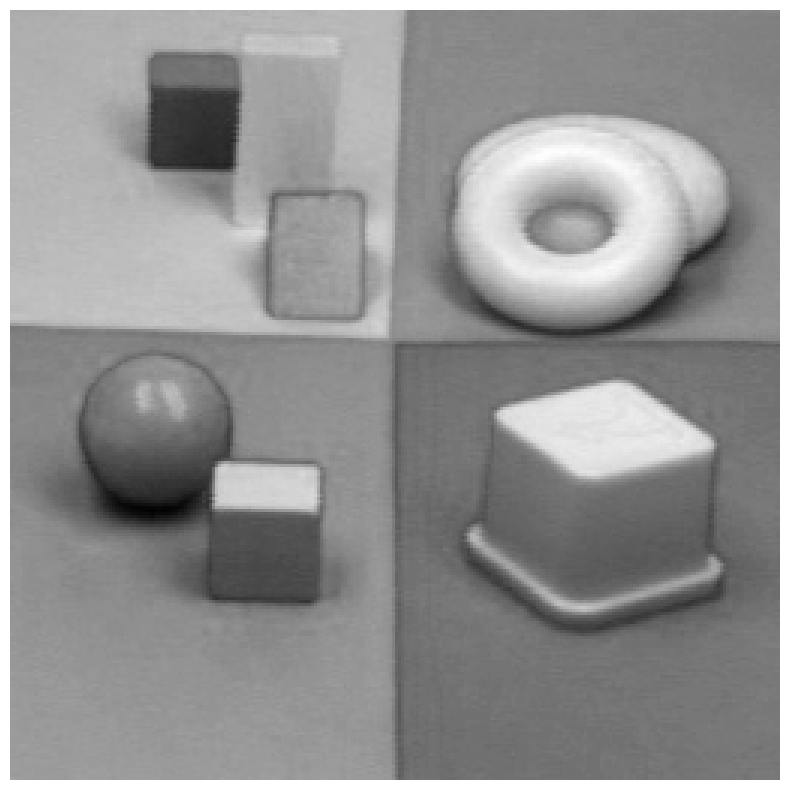

In [108]:
#CODE EXAMPLE: plot each channel separately
plt.figure(figsize=(10,10))
plt.imshow(hsv[:,:,0], cmap='gray')
plt.axis('off');
plt.figure(figsize=(10,10))
plt.imshow(hsv[:,:,1], cmap='gray')
plt.axis('off');
plt.figure(figsize=(10,10))
plt.imshow(hsv[:,:,2], cmap='gray')
plt.axis('off');

Kijk wat er nu veranderd is, wanneer we Canny op de losse kleur kanalen toepassen.

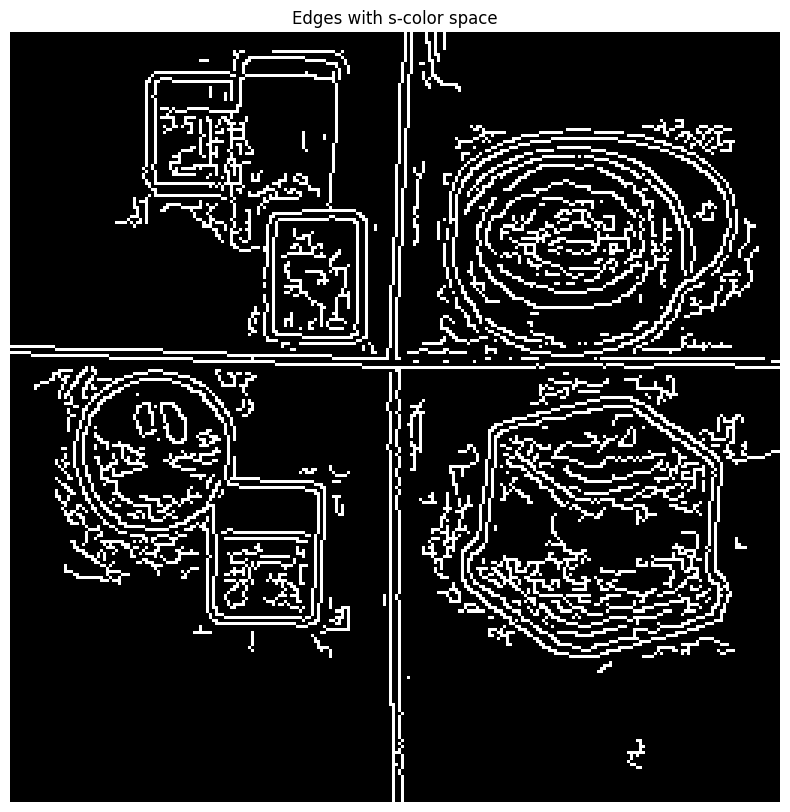

In [109]:
#CODE EXAMPLE. Exercise play with the parameters of v
s_edges = cv2.Canny(hsv[:,:,1], 20, 50) #change parameters 'lower' and 'upper' bounds to get optimal result

plt.figure(figsize=(10,10))
plt.imshow(s_edges, cmap='gray')
plt.title('Edges with s-color space')
plt.axis('off');

## 2. Detecteer gezichten met Haar Cascade

In het college hebben we gesproken over een (verouderde) technologie die jarenlang gebruikt is voor het herkennen objecten in gezichten: Haar Cascade. We gaan deze toch gebruiken, zodat jullie volgende week ook het verschil met moderne technieken als CNN gaan zien.


### OEFENING 4:  Zoek een plaatje en toon het
TO DO:
- Zoek een kleuren foto met 7 gezichten of meer.
- Laad de afbeelding in met de eerder gebruikte matplotlib code
- Laat de foto op het scherm zien. Zet axis op off en geef het plaatje een titel.
 

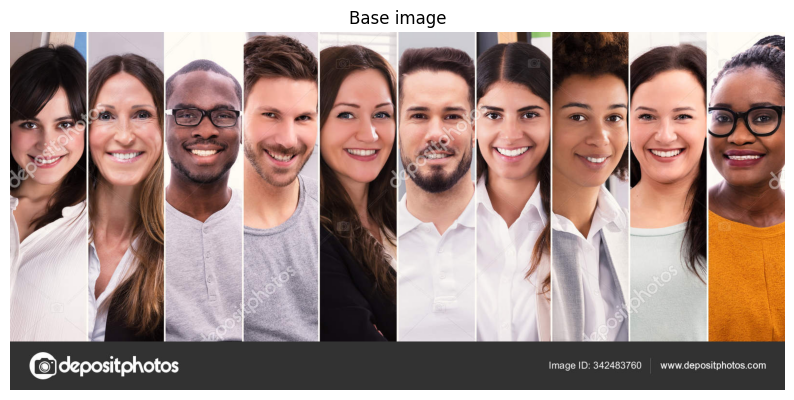

In [110]:
img = plt.imread('faces.jpg')  
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title('Base image')
plt.axis('off');

Welk datatype heeft de ingeladen afbeelding?

Hoe groot is de afbeelding in pixels?
Gebruik de code hieronder.

In [111]:
#print type and shape of image
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(740, 1600, 3)


### OEFENING 5: Zet een kleurenplaatje om in een grijswaarden plaatje.

(Als je foto al zwart-wit is dan kun je deze stap overslaan.)

Gebruik de code van oefening 1


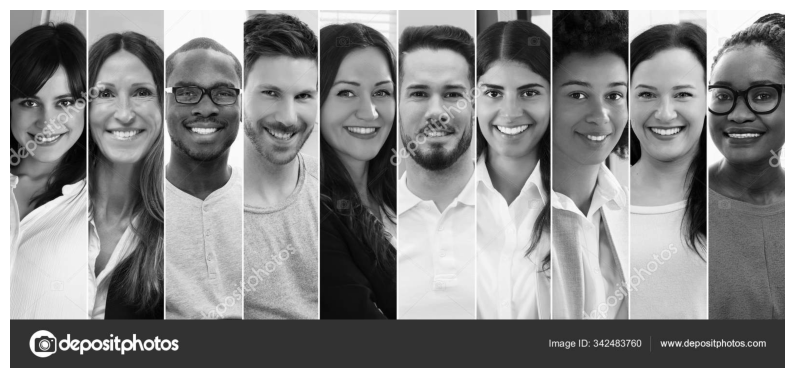

In [112]:
# Use the cvtColor() function to grayscale the image 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

plt.figure(figsize=(10,10))
plt.imshow(gray, cmap='gray')
plt.axis('off');

### Haar Cascade detector


Bekijk de eerste minuut van de volgende video waarin een Haar Cascade wordt gevisualiseerd:
https://vimeo.com/12774628

Haar Cascades gebruiken voorgetrainde modellen. Deze zijn in OpenCV te vinden via ```cv2.data.haarcascades``` method.

Een toelichting op Haar Cascade met code voorbeelden kun je hier vinden:
https://www.geeksforgeeks.org/face-detection-using-cascade-classifier-using-opencv-python/


### OEFENING 6: Initieer de Haar Cascade detector

To do:
- initialiseer de Haar Cascade


In [113]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# Controleer of de initialisatie succesvol was
if face_cascade.empty():
    print("Kon de Haar Cascade-detector niet initialiseren.")
else:
    print("Haar Cascade-detector geïnitialiseerd voor gezichtsdetectie.")

Haar Cascade-detector geïnitialiseerd voor gezichtsdetectie.


### OEFENING 7: Detecteer gezichten

Bepaal met de classifier ``face_cascade.detectMultiScale()`` de gezichten in het plaatje.

Link: https://www.geeksforgeeks.org/face-detection-using-cascade-classifier-using-opencv-python/

Hoeveel heb je er gevonden?

In [149]:
# YOUR CODE HERE

# Ik heb de waardes aangepast om zo goed mogelijk gezichten te herkennen, je kan de accuratie aanpassen door de waardes aan te passen
# Scalefactor helpt bij het detectereen van details
# MinNeighbours om valse positieven te verminderen
# Min en max size voor grote van het gezichten
faces = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5, minSize=(30, 30), maxSize=(300, 300))


In [150]:
#print shape[0] van de variable faces.
print("Aantal gezichten: " + str(faces.shape[0]))

Aantal gezichten: 8


In [142]:
# Inspecteer 'faces'. Wat geeft deze array weer denk je?
faces

array([[ 138,   99,  195,  195],
       [ 468,  101,  205,  205],
       [  13,  143,  140,  140],
       [ 633,  101,  193,  193],
       [ 780,   98,  201,  201],
       [ 944,  101,  185,  185],
       [1256,  101,  197,  197],
       [1113,  106,  190,  190]])

### Toon rechthoeken om de gevonden gezichten

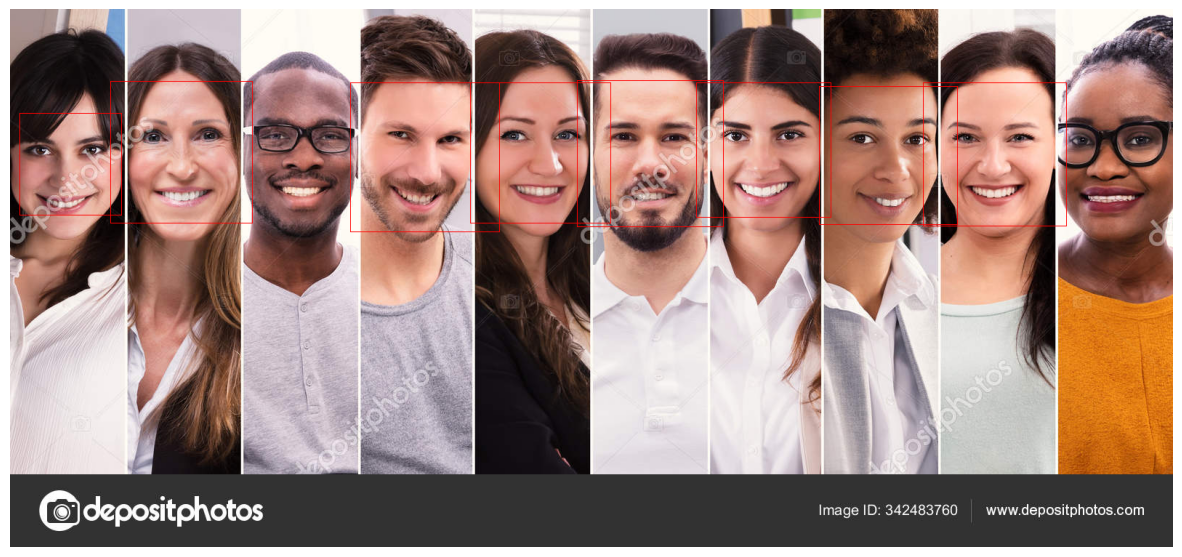

In [143]:
# Maak een kopie van de afbeelding die wordt opgeslagen als cv::UMat
img_copy = cv2.UMat(img)

# Loop door elke gedetecteerde gezichtspositie en teken een rechthoek
for (x, y, w, h) in faces:
    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 0, 0), 1) #maakt een rechthoek met de waarden 

# Toon de afbeelding met gemarkeerde gezichten
plt.figure(figsize=(15,10))
plt.imshow(cv2.UMat.get(img_copy))
plt.axis('off')
plt.show()


### Evalueer de resultaten

Vragen:
1. Hoe goed is jouw detector in vergelijking met wat je zelf ziet?

2. Kun je de parameters van `face_cascade.detectMultiScale` varieren zodat de detectie beter wordt?

To do: Maak hierover een aantekening in je logboek. 

### Detecteer ook de ogen en de mond

Hint: er zijn nog meer .xml files met detectoren

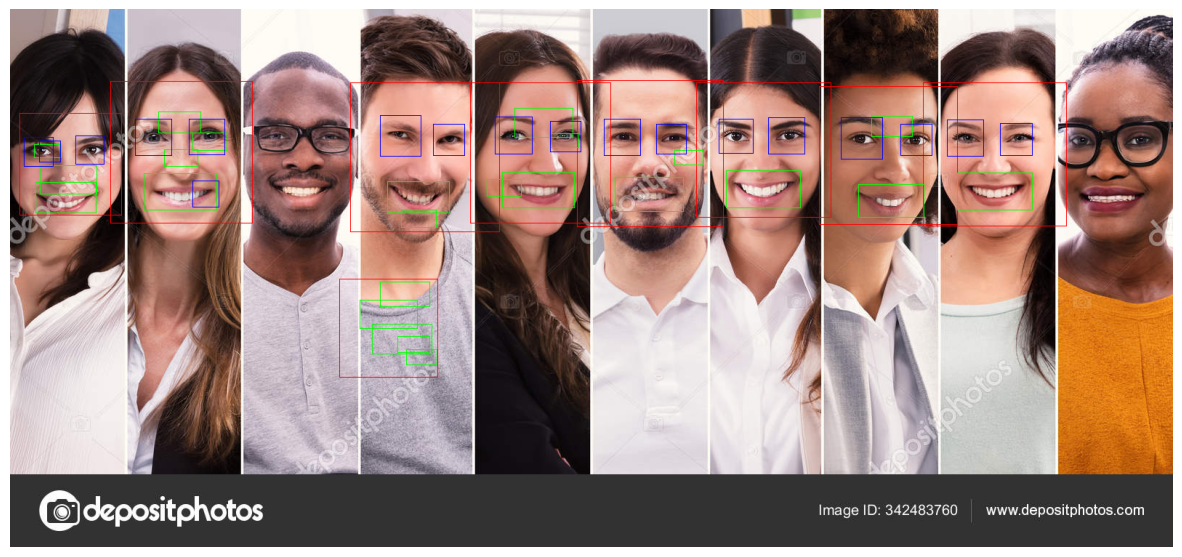

In [156]:
import cv2
import matplotlib.pyplot as plt

# Laad de afbeelding
img2 = plt.imread('faces.jpg')

# Laad de Haar Cascade-modellen voor glimlach- en oogdetectie
sc = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
ec = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Maak een UMat van de afbeelding
img_copy2 = cv2.UMat(img2)

# Detecteer gezichten
faces = face_cascade.detectMultiScale(img2, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Teken rechthoeken rond de gedetecteerde gezichten
for (x,y,w,h) in faces:
    cv2.rectangle(img_copy2, (x,y), (x+w,y+h), (255,0,0), 1)

# Loop over elk gedetecteerd gezicht en detecteer glimlachen en ogen
for (x,y,w,h) in faces:
    face = img2[y:y+h, x:x+w]  # Selecteer het gezichtsgebied
    smiles = sc.detectMultiScale(face, scaleFactor=1.1, minNeighbors=5, minSize=(5,5))
    eyes = ec.detectMultiScale(face, scaleFactor=1.1, minNeighbors=5, minSize=(1,1))
    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(img_copy2, (x + sx, y + sy), (x + sx + sw, y + sy + sh), (0,255,0), 1)  # Teken een groene rechthoek voor een glimlach
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(img_copy2, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (0,0,255), 1)  # Teken een rode rechthoek voor een oog

# Toon de afbeelding met de gedetecteerde gezichten, glimlachen en ogen
plt.figure(figsize=(15,10))
plt.imshow(cv2.UMat.get(img_copy2))
plt.axis('off')
plt.show()

### Bonus: Blur het gezicht
Zoek in de Geeks for Geeks tutorial onder 'projects' hoe je het gezicht kunt blurren.

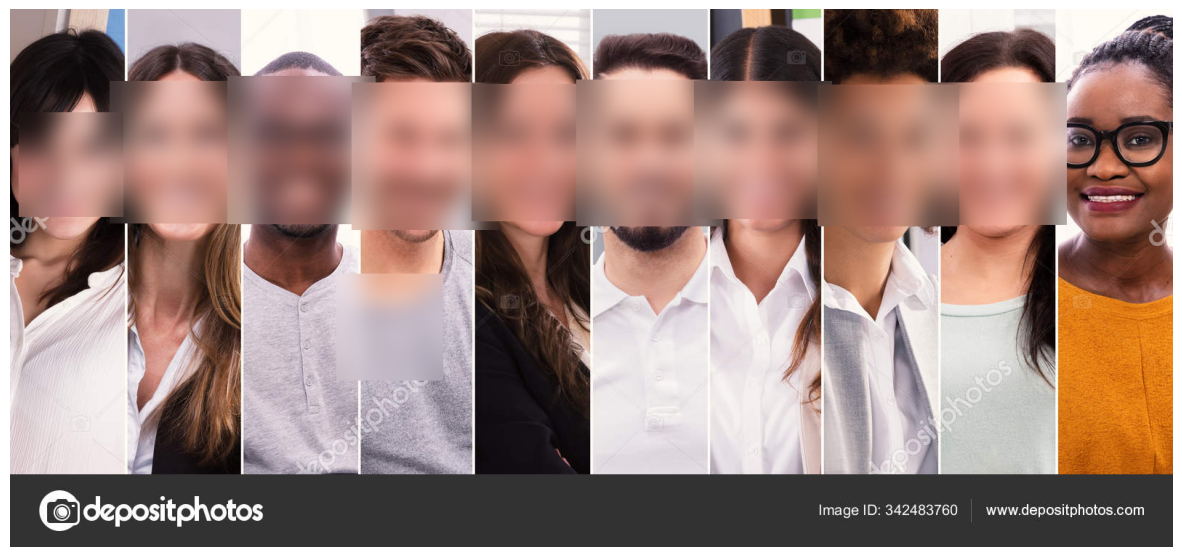

In [157]:
# Lees de afbeelding
img3 = cv2.imread('faces.jpg')  # Gebruik cv2.imread in plaats van plt.imread

# Laad de Haar Cascade-modellen voor glimlach- en oogdetectie
sc = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
ec = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Converteer de afbeelding naar grijswaarden
gray_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# Detecteer gezichten
faces = face_cascade.detectMultiScale(gray_img3, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Loop over elk gedetecteerd gezicht
for (x, y, w, h) in faces:
    # Selecteer het gezichtsgebied
    face = img3[y:y+h, x:x+w]

    # Vervagen van het gezichtsgebied met Gaussian blur
    blurred_face = cv2.GaussianBlur(face, (101, 101), 0)  # Pas de kernelgrootte aan naar wens

# Plaats het vervaagde gezicht terug in de oorspronkelijke afbeelding
    img3[y:y+h, x:x+w] = blurred_face

# Toon de afbeelding met de vervaging van de gezichten
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))  # Converteer BGR naar RGB voor weergave met Matplotlib
plt.axis('off')
plt.show()

## 3. Gebruik de webcam

De opencv library wordt (nog steeds) veel gebruikt voor het maken van opnames met een webcam. 

Zoek in de documentatie van de ``OpenCV`` library naar ``VideoCapture()``. 

Hint: gebruik de Geeks for Geeks tutorial: https://www.geeksforgeeks.org/opencv-python-tutorial/?ref=lbp  

### OEFENING 8: Maak een script waarbij je de camera aanroept
### Ik heb extra toegevoegd dat er gezichten worden herkend

In [167]:
# Functie om de camera vast te leggen en beelden weer te geven
def capture_camera():
    # Maak een VideoCapture-object om toegang te krijgen tot de camera (0 voor de standaardcamera)
    cap = cv2.VideoCapture(0)

    # Controleer of de camera correct is geopend
    if not cap.isOpened():
        print("Kan de camera niet openen. Controleer of de camera correct is aangesloten of geïnstalleerd.")
        return

    # Laad de Haar Cascade-classifier voor gezichtsdetectie
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Variabele om bij te houden wanneer de opname moet stoppen
    end_time = cv2.getTickCount() + 10 * cv2.getTickFrequency()  # 10 seconden

    # Loop voor het vastleggen van beelden van de camera
    while cv2.getTickCount() < end_time:
        # Lees frames van de camera
        ret, frame = cap.read()

        # Controleer of de frame correct is gelezen
        if not ret:
            print("Kan geen frames lezen van de camera.")
            break

        # Converteer het frame naar grijswaarden voor gezichtsdetectie
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detecteer gezichten in het frame
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Teken rechthoeken rond de gedetecteerde gezichten
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Toon het frame in een venster met de naam 'Camera'
        cv2.imshow('Camera', frame)

        # Stop de loop wanneer 'q' wordt ingedrukt
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Sluit de VideoCapture en vernietig alle OpenCV-vensters
    cap.release()
    cv2.destroyAllWindows()

# Roep de functie aan om de camera vast te leggen
capture_camera()


# Afronding

1. Sla het ingevulde notebook op in je portfolio op GitLab - Minor Logboek AAI.
2. Maak een aantekening in je logboek
3. Werk je Bloom tabel bij.